# Models Pipeline

We want to see how different models affect our dataset.

In [1]:
from preprocessing import load_dataset, split_dataset, grid_search, feature_interaction_polynomyal_degreee2, corresponding_features_interaction, corresponding_features_custom_interaction
from utilities import plot_grid_results, print_log
import models

We define the generic parameters, to be used to split the dataset.

In [2]:
test_size = 0.2         # the ratio of the dataset we want to use as test set
stratify = True         # Whether we want the split to keep the same proportion between classes as the original dataset
k = 5                   # The number of folds for the (stratified) k fold 

First of all, we load the dataset and we split it into training and test set (to be used only in the end).

In [3]:
# first, we load the dataset
X, y = load_dataset('./data/data.pkl')
# then, we split it
X_tr, y_tr, X_te, y_te = split_dataset(X, y, test=test_size, stratify=stratify)

# generate the dataset version with interaction, with/without drop
X_tr_drop = corresponding_features_custom_interaction(X_tr, drop=True)
X_tr_int = corresponding_features_custom_interaction(X_tr, drop=False)


Now, we can start to try the grid search with different models, to see how it behaves.

Notice we want to have high __*recall*__ for class 'MATCH' (that is, we want to detect as many MATCH samples as possible). For this reason, we put recall as main metric for our grid search.

## K-Nearest Neighbors

We run a grid search on the kNN model, trying values of k from 1 to 10. Since our data is highly dimensional, we expect such an algorithm to perform bad.

### 1. No interactions, no PCA

In [4]:
# get pipeline 
pipe, grid = models.scaling(models.knn)
# call grid_search
out_knn = grid_search(X_tr, y_tr, pipe, grid, k)

print_log(out_knn)

Best model (according to recall): {'model__n_neighbors': 1}
-----------------------------------------
Recall : 0.22121566335476328
Balanced accuracy: 0.5368385842256359
f1: 0.21913922867942187


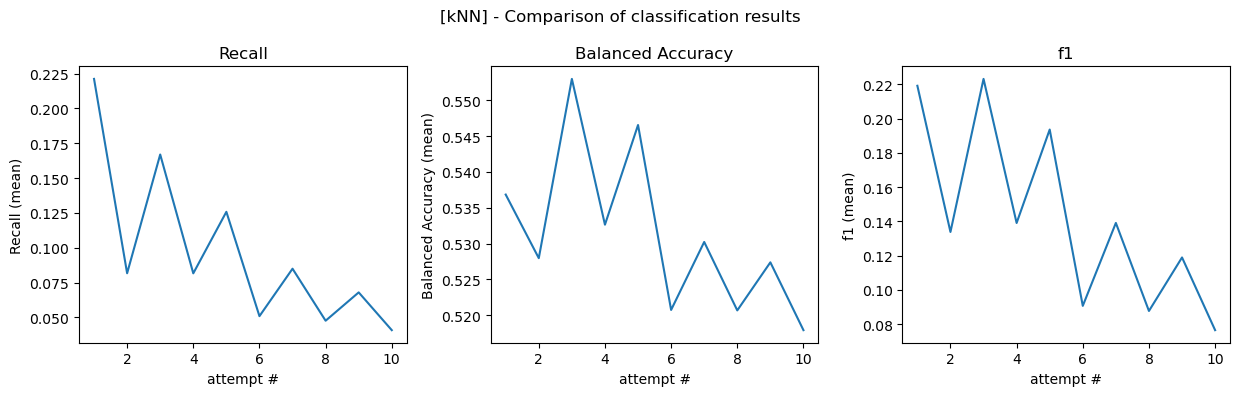

In [5]:
# Plot recall, balanced accuracy and f1 metric for every k in the range
plot_grid_results(out_knn, 'kNN')

### 2. Interactions, drop, PCA

In [6]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[25, 58], model_f = models.knn)
# call grid_search
out_knn = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print_log(out_knn)

Best model (according to recall): {'model__n_neighbors': 9, 'pca__n_components': 58}
-----------------------------------------
Recall : 0.47632963179427235
Balanced accuracy: 0.5771358535344068
f1: 0.2962232129232961


As expected, we get a really low performance. ...FIXME

## Logistic Regression

Normal Logistic Regression does not converge. We try some strategies to reduce the dimensionality of our data.

### 1. LR - with interaction, drop, scaling



In [7]:
# get pipeline 
pipe, grid = models.scaling(models.logistic_regression)
# call grid_search
out_lr_drop = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print_log(out_lr_drop)

Best model (according to recall): {'model__C': 10}
-----------------------------------------
Recall : 0.47609585037989477
Balanced accuracy: 0.5603720118601629
f1: 0.2793179893553591


### 2. LR - with interaction, drop, PCA

In [8]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[20, 30, 58], model_f=models.logistic_regression)
# call grid_search
out_lr_pca = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print_log(out_lr_pca)

Best model (according to recall): {'model__C': 10, 'pca__n_components': 20}
-----------------------------------------
Recall : 0.32653419053185273
Balanced accuracy: 0.536769194987935
f1: 0.24205693234920686


## Random Forest

In [9]:
# get pipeline 
pipe, grid = models.over_sampling(models.scaling, model_f = models.random_forest)
# call grid_search
out_rf = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print_log(out_rf)

Best model (according to recall): {'model__criterion': 'entropy', 'model__min_samples_split': 5, 'model__n_estimators': 100}
-----------------------------------------
Recall : 0.10900058445353596
Balanced accuracy: 0.5353524047639813
f1: 0.16343195747623238


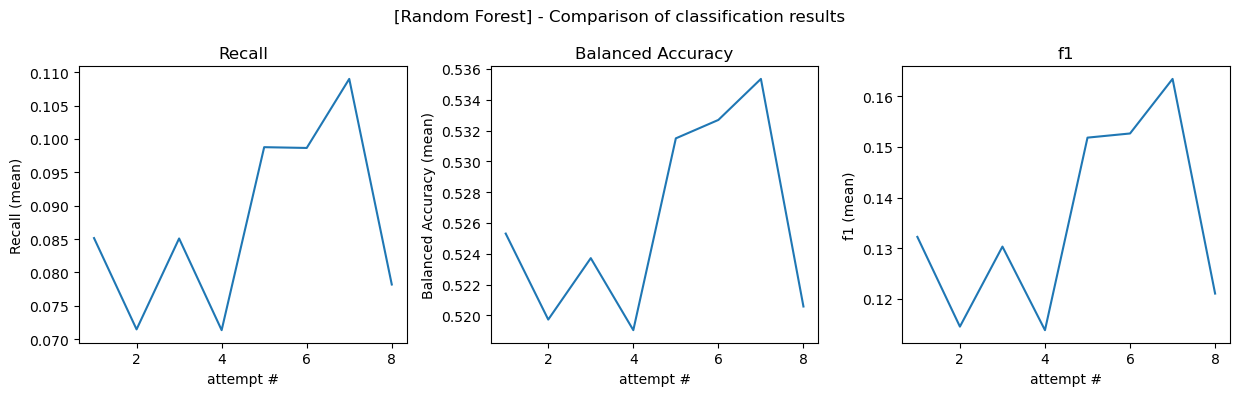

In [10]:
plot_grid_results(out_rf, 'Random Forest')